In [20]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
#Loading list of training images

file = open("/content/drive/MyDrive/IndoorSceneClassification/data/TrainImages.txt","r")
train_images = file.read().split("\n")
train_images = [i.split("/") for i in train_images]
print(train_images)

[['gameroom', 'bt_132294gameroom2.jpg'], ['poolinside', 'inside_pool_and_hot_tub.jpg'], ['winecellar', 'bodega_12_11_flickr.jpg'], ['casino', 'casino_0512.jpg'], ['livingroom', 'living58.jpg'], ['mall', '4984307.jpg'], ['corridor', 'pasilltmpo_t.jpg'], ['laboratorywet', 'laboratorio_quimica_07_05_altavista.jpg'], ['bookstore', 'CIMG2743.jpg'], ['casino', 'casino_0044.jpg'], ['waitingroom', '800px_VTBS_Waiting_room_of_Thai_Airways.jpg'], ['clothingstore', 'c0011.jpg'], ['garage', 'mso1012_FridgeBikes_aft_w609.jpg'], ['prisoncell', 'territorial_prison_cell_block.jpg'], ['tv_studio', 'tv_studio_11_13_altavista.jpg'], ['inside_bus', 'inside_bus_024.jpg'], ['laboratorywet', 'wet_lab_10_17_altavista.jpg'], ['videostore', 'videoclub_07_11_flickr.jpg'], ['grocerystore', 'Market5.jpg'], ['inside_bus', 'inside_bus_078.jpg'], ['bathroom', 'itoiletpaper.jpg'], ['closet', '458309322_42d901b9d8.jpg'], ['laboratorywet', 'wet_lab_13_10_altavista.jpg'], ['winecellar', 'cave_vin_10_10_altavista.jpg'], [

clothingstore


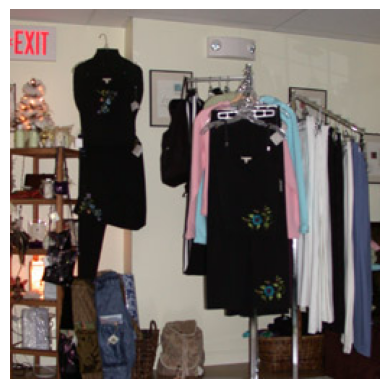

In [41]:
#Viewing random images and their labels

random_image = random.choice(train_images)
random_image_path = '/content/drive/MyDrive/IndoorSceneClassification/data/train/' + random_image[0] + '/' + random_image[1]
random_img_viewed = mpimg.imread(random_image_path)
print(random_image[0])
plt.imshow(random_img_viewed)
plt.axis('off')
plt.show()

In [24]:
#Creating a placeholder model structure to load model weights of the custom_cnn_model training in models/training.ipynb

custom_cnn_model_template = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", name="conv2d_3_activations_layer"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(67,activation="sigmoid")
])

In [25]:
#Loading weights from the custom_cnn_weights.h5 file in the placeholder model structure defined above

custom_cnn_model_template.load_weights('/content/drive/MyDrive/IndoorSceneClassification/model_weights/custom_cnn_model.h5')

In [26]:
#Fetching the third convolution layer for generating the activation maps

activation_layer_name = 'conv2d_3_activations_layer'
activation_model = tf.keras.Model(inputs=custom_cnn_model_template.input,
                                  outputs=custom_cnn_model_template.get_layer(activation_layer_name).output)

In [39]:
#Creating a function to create an activation map for all 10 filters in the conv_2d_activations_layer

def visualize_activations(input_image):
    activations = activation_model.predict(input_image.reshape(1, 224, 224, 3))
    plt.figure(figsize=(10, 4))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(activations[0, :, :, i], cmap='viridis')
        plt.title("Filter "+str(i+1))
        plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 51ms/step


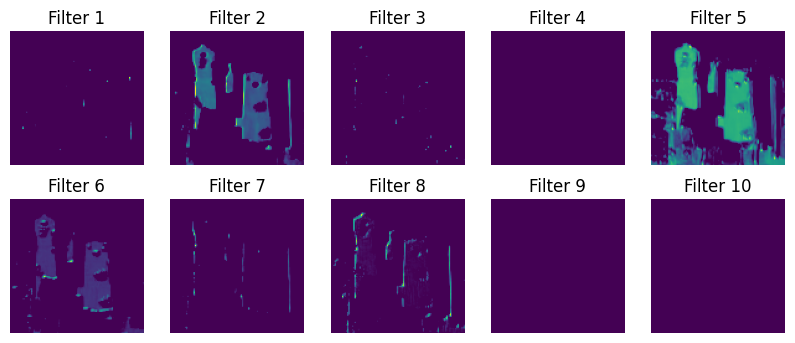

In [42]:
#Preprocessing the random image and visualizing effect of filters

input_image = plt.imread(random_image_path)
input_image = tf.image.resize(input_image, (224,224))
input_image = input_image / 255.0
input_image = np.expand_dims(input_image, axis=0)

visualize_activations(input_image)

In [29]:
%run /content/drive/MyDrive/IndoorSceneClassification/data/preprocessing.ipynb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5359 images belonging to 67 classes.
The number of batches is:  168
Size of each batch is:  (32, 224, 224, 3) (32, 67)
Found 1340 images belonging to 67 classes.
The number of batches is:  42
Size of each batch is:  (32, 224, 224, 3) (32, 67)
Found 5359 files belonging to 67 classes.
Found 1340 files belonging to 67 classes.
5359


In [13]:
custom_cnn_model_template.predict(test_data_fine_tuning)

42/42 [==============================] - 178s 3s/step


array([[4.94105912e-08, 9.28528863e-08, 2.95260150e-09, ...,
        5.87701656e-08, 3.26234826e-08, 6.47157161e-10],
       [4.73638505e-01, 5.08046567e-01, 5.18810928e-01, ...,
        5.23646355e-01, 5.08238077e-01, 5.63556731e-01],
       [2.89659470e-01, 1.47683874e-01, 5.88011593e-02, ...,
        4.23404835e-02, 8.17689151e-02, 6.06267788e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.05774996e-08, 8.71204833e-08, 6.12038908e-09, ...,
        1.22886042e-11, 9.52121992e-11, 2.76275114e-09],
       [1.55203161e-05, 4.24537400e-04, 1.59927066e-02, ...,
        9.38899393e-06, 5.78754054e-07, 1.51141785e-05]], dtype=float32)